In [1]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()


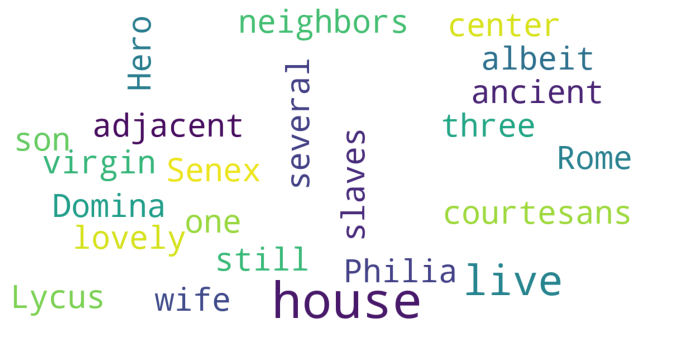

In [2]:
text = """In ancient Rome, some neighbors live in three adjacent houses. In the center is 
the house of Senex, who lives there with wife Domina, son Hero, and several slaves, the 
lovely Philia, one of the courtesans in the House of Lycus (albeit still a virgin).""" 

show_wordcloud(text)

In [3]:
import spacy 
from spacy import displacy 
nlp = spacy.load('en_core_web_lg') 

In [4]:
doc = nlp(u'Apple is going to build a U.K. factory for $6 million.') 
displacy.render(doc, style='dep', jupyter=True, options={'distance': 80}) 

In [5]:
for token in doc: 
 print(f'{token.text:{10}} {token.pos_:{7}} {token.dep_:{7}} {spacy.explain(token.dep_)}') 

Apple      PROPN   nsubj   nominal subject
is         AUX     aux     auxiliary
going      VERB    ROOT    root
to         PART    aux     auxiliary
build      VERB    xcomp   open clausal complement
a          DET     det     determiner
U.K.       PROPN   compound compound
factory    NOUN    dobj    direct object
for        ADP     prep    prepositional modifier
$          SYM     quantmod modifier of quantifier
6          NUM     compound compound
million    NUM     pobj    object of preposition
.          PUNCT   punct   punctuation


In [6]:
# doc = nlp(u'This is a sentence.') 
# displacy.serve(doc, style='dep')

In [7]:
text = """In ancient Rome, some neighbors live in three adjacent houses. In the center is 
the house of Senex, who lives there with wife Domina, son Hero, and several slaves, the 
lovely Philia, one of the courtesans in the House of Lycus (albeit still a virgin).""" 
doc = nlp(text) 
sentence_spans = list(doc.sents) 

In [8]:
displacy.render(sentence_spans, style="dep",options={'distance': 50}) 

In [9]:
doc1 = nlp("This is a sentence.") 
doc2 = nlp("This is another sentence.") 
html = displacy.render([doc1, doc2], style="dep", page=True)

In [10]:
doc = nlp("Rats are various medium-sized, long-tailed rodents.") 
displacy.render(doc, style="dep")

In [11]:
from IPython.core.display import display, HTML 
html = displacy.render(doc, style="dep") 
display(HTML(html)) 

<IPython.core.display.HTML object>

In [12]:
from pathlib import Path 
nlp = spacy.load("en_core_web_sm") 
sentences = ["This is an example.", "This is another one."] 
for sent in sentences: 
 doc = nlp(sent) 
 svg = displacy.render(doc, style="dep", jupyter=False) 
 file_name = '-'.join([w.text for w in doc if not w.is_punct]) + ".svg" 
 output_path = Path( "data//" + file_name) 
 output_path.open("w", encoding="utf-8").write( svg) 

In [13]:
doc = nlp('Over the last quarter Apple sold nearly 20 thousand iPods for a profit of $6 million. By contrast, Sony sold only 7 thousand Walkman music players.') 
displacy.render(doc, style="dep", options={"compact": True, "bg": "green", 
 'distance': 80,"color": "yellow", 
 "font": "Source Sans Pro"}) 

In [14]:
doc = nlp('Over the last quarter Apple sold nearly 20 thousand iPods for a profit of $6 million.') 
displacy.render(doc, style='ent', jupyter=True)

In [15]:
doc = nlp(u'Over the last quarter Apple sold nearly 20 thousand iPods for a profit of $6 million. By contrast, Sony sold only 7 thousand Walkman music players.') 
displacy.render(doc, style='ent', jupyter=True) 


In [16]:
doc2 = nlp(u'Over the last quarter Apple sold nearly 20 thousand iPods for a profit of $6 million. By contrast, my kids sold a lot of lemonade.') 
for sent in doc2.sents: 
 docx = nlp(sent.text) 
 if docx.ents: 
  displacy.render(docx, style='ent', jupyter=True) 
 else: 
  print(docx.text) 

By contrast, my kids sold a lot of lemonade.


In [17]:
options = {'ents': ['ORG', 'PRODUCT']} 

In [18]:
displacy.render(doc, style='ent', jupyter=True, options=options) 

In [19]:
colors = {'ORG': 'linear-gradient(90deg, #aa9cfc, #fc9ce7)', 'PRODUCT': 'radialgradient(yellow, green)'} 
options = {'ents': ['ORG', 'PRODUCT'], 'colors':colors} 
displacy.render(doc, style='ent', jupyter=True, options=options) 
text = "When Sebastian Thrun started working on self-driving cars at Google in 2007, few people outside of the company took him seriously." 
doc = nlp(text) 
displacy.render(doc, style="ent") 
colors = {"ORG": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"} 
options = {"ents": ["ORG"], "colors": colors} 
displacy.render(doc, style="ent", options=options) 
doc = nlp("This is a sentence about Google.") 
doc.user_data["title"] = "This is a title" 
displacy.render(doc, style="ent") 
 
ex = [{"text": "But Google is starting from behind.", 
 "ents": [{"start": 4, "end": 10, "label": "ORG"}], 
 "title": None}] 
html = displacy.render(ex, style="ent", manual=True) 

In [20]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag , ne_chunk
from nltk.chunk import tree2conlltags,conlltags2tree

In [21]:
text = """In ancient Rome, some neighbors live in three adjacent houses. In the center is 
the house of Senex, who lives there with wife Domina, son Hero, and several slaves, the 
lovely Philia, one of the courtesans in the House of Lycus (albeit still a virgin).""" 

tags=pos_tag(word_tokenize(text))
chunck = tree2conlltags(ne_chunk(tags))

In [22]:
print(chunck)

[('In', 'IN', 'O'), ('ancient', 'JJ', 'O'), ('Rome', 'NNP', 'B-GPE'), (',', ',', 'O'), ('some', 'DT', 'O'), ('neighbors', 'NNS', 'O'), ('live', 'VBP', 'O'), ('in', 'IN', 'O'), ('three', 'CD', 'O'), ('adjacent', 'JJ', 'O'), ('houses', 'NNS', 'O'), ('.', '.', 'O'), ('In', 'IN', 'O'), ('the', 'DT', 'O'), ('center', 'NN', 'O'), ('is', 'VBZ', 'O'), ('the', 'DT', 'O'), ('house', 'NN', 'O'), ('of', 'IN', 'O'), ('Senex', 'NNP', 'B-GPE'), (',', ',', 'O'), ('who', 'WP', 'O'), ('lives', 'VBZ', 'O'), ('there', 'EX', 'O'), ('with', 'IN', 'O'), ('wife', 'NN', 'O'), ('Domina', 'NNP', 'B-GPE'), (',', ',', 'O'), ('son', 'NN', 'O'), ('Hero', 'NNP', 'B-PERSON'), (',', ',', 'O'), ('and', 'CC', 'O'), ('several', 'JJ', 'O'), ('slaves', 'NNS', 'O'), (',', ',', 'O'), ('the', 'DT', 'O'), ('lovely', 'JJ', 'O'), ('Philia', 'NNP', 'B-GPE'), (',', ',', 'O'), ('one', 'CD', 'O'), ('of', 'IN', 'O'), ('the', 'DT', 'O'), ('courtesans', 'NNS', 'O'), ('in', 'IN', 'O'), ('the', 'DT', 'O'), ('House', 'NNP', 'B-ORGANIZATION

In [23]:
conlltags2tree(chunck).draw()